## 654 Assignment 3
### Huaijin Xin

### Part I

#### A

In [1]:
import pandas as pd

In [5]:
bank_churn_df = pd.read_csv("/Users/xinhuaijin/Desktop/654 hw3/bankchurn.csv")

In [6]:
bank_churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### B

In [7]:
categorical_vars = bank_churn_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = bank_churn_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [8]:
print("catigirical variables are" , categorical_vars)

catigirical variables are ['Surname', 'Geography', 'Gender']


In [9]:
print("numerical variables are", numerical_vars)

numerical variables are ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


#### C

In [10]:
bank_churn_df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

a. 0 (Not Exited): 79.63% of the customers have not exited.
   1 (Exited): 20.37% of the customers have exited.
   
b. Oversampling in machine learning refers to a technique used to adjust the class distribution of a dataset. It's particularly useful when dealing with imbalanced datasets, where one class is significantly underrepresented compared to others. In oversampling, additional data points are generated for the underrepresented class, either by duplicating existing data points or by synthesizing new ones (e.g., using methods like SMOTE - Synthetic Minority Over-sampling Technique). The goal is to create a balanced dataset, which can lead to better model performance, especially in terms of minority class prediction.

#### D

a.

In [11]:
unique_counts = bank_churn_df[categorical_vars].nunique()

In [14]:
unique_counts

Surname      2932
Geography       3
Gender          2
dtype: int64

In [16]:
len(bank_churn_df)

10000

There is no catagorical variable with all values unique

b. Yes Surname has 2932 unique values.

In [17]:
#i
bank_churn_df.drop('Surname', axis=1, inplace=True) 

c. In machine learning, a categorical variable where each level is unique (i.e., each value is distinct and occurs only once) does not provide any predictive power. This is because the model cannot learn any generalizable pattern from unique values. Such variables often represent identifiers (like a customer ID) that are unique to each instance and do not contribute to the underlying patterns in the data.

#### E

In [18]:
bank_churn_df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values

#### F

In [19]:
correlation_matrix = bank_churn_df[numerical_vars].corr()

correlation_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


i. The correlation matrix shows that there are no extremely high correlations between any pair of variables that would indicate a serious problem with multicollinearity. The highest correlation observed is between Balance and NumOfProducts (-0.30), but this is not high enough to be concerning.

#### G

In [21]:
categorical_vars = ['Geography', 'Gender']
bank_churn_dummified = pd.get_dummies(bank_churn_df, columns=categorical_vars, drop_first=True)

In [22]:
bank_churn_dummified.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### H

In [24]:
from sklearn.model_selection import train_test_split

# Task H: Creating a data partition
X = bank_churn_dummified.drop(['Exited'], axis=1)
y = bank_churn_dummified['Exited']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Verifying the split
train_test_split_summary = {
    "Training Set Size": X_train.shape[0],
    "Test Set Size": X_test.shape[0]
}
train_test_split_summary

{'Training Set Size': 6000, 'Test Set Size': 4000}

This split adheres to the 60% training and 40% test set allocation, using a random state of 123.

#### I

In [25]:
grouped_means = bank_churn_dummified.groupby('Exited').mean()

grouped_means

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
Exited,,,,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.572523
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.440844


1.Age: Older customers are more likely to exit. This could be due to various life stage changes, such as retirement or changing financial needs.
2.IsActiveMember: Less active members are more likely to exit, possibly indicating dissatisfaction with the bank's services or lack of engagement with its products.
3.Geography_Germany: A higher proportion of customers from Germany exited. This may suggest regional differences in banking needs or satisfaction levels.

### Iteration 1

#### J

In [27]:
import statsmodels.api as sm
# Preparing the independent variables (X) and dependent variable (y) for the model
X_train_model = sm.add_constant(X_train)  # Adding a constant to the model
y_train_model = y_train

# Building the logistic regression model
log_reg_model = sm.Logit(y_train_model, X_train_model).fit()


Optimization terminated successfully.
         Current function value: 0.432368
         Iterations 6


#### H

In [28]:
log_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5986
Method:                           MLE   Df Model:                           13
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.1510
Time:                        23:06:44   Log-Likelihood:                -2594.2
converged:                       True   LL-Null:                       -3055.7
Covariance Type:            nonrobust   LLR p-value:                5.989e-189
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2259      7.613      0.555      0.579     -10.696      19.148
RowNumber         -9.793e-06    1.2e-05     -0.813      0.416   -3.34e-05    1.38e-05
CustomerId        -4.566e-07   4.85e-07     -0.941      0.346   -1.41e-06    4.94e-07
CreditScore          -0.0012      0.000     -3.422      0.001      -0.002      -0.001
Age                   0.0694      0.003     21.471      0.000       0.063       0.076
Tenure               -0.0177      0.012     -1.467      0.142      -0.041       0.006
Balance            3.187e-06   6.58e-07      4.843      0.000     1.9e-06    4.48e-06
NumOfProducts        -0.0614      0.060     -1.023      0.306      -0.179       0.056
HasCrCard            -0.0530      0.076     -0.694      0.488      -0.203       0.097
IsActiveMember       -1.0285      0.074    -13.992      0.000      -1.173      -0.884
EstimatedSalary    2.446e-07   6.05e-07      0.404      0.686   -9.41e-07    1.43e-06
Geography_Germany     0.8177      0.087      9.389      0.000       0.647       0.988
Geography_Spain       0.0522      0.090      0.577      0.564      -0.125       0.229
Gender_Male          -0.5097      0.070     -7.290      0.000      -0.647      -0.373
=====================================================================================
"""

In [ ]:
a. RowNumber,CustomerId,Tenure,NumOfProducts,HasCrCard,EstimatedSalary
shows high p-value.
b.Geography_Spain shows high p-value.

### Iteration 2

#### L

In [30]:
variables_to_drop = ['RowNumber', 'CustomerId', 'Tenure', 'NumOfProducts', 
                     'HasCrCard', 'EstimatedSalary', 'Geography_Spain']
X_train_model_reduced = X_train_model.drop(variables_to_drop, axis=1)
log_reg_model_reduced = sm.Logit(y_train, X_train_model_reduced).fit()
log_reg_model_summary_reduced = log_reg_model_reduced.summary()
log_reg_model_summary_reduced

Optimization terminated successfully.
         Current function value: 0.432850
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5993
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.1501
Time:                        23:14:51   Log-Likelihood:                -2597.1
converged:                       True   LL-Null:                       -3055.7
Covariance Type:            nonrobust   LLR p-value:                7.204e-195
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.1705      0.272    -11.637      0.000      -3.704      -2.636
CreditScore          -0.0012      0.000     -3.447      0.001      -0.002      -0.001
Age                   0.0694      0.003     21.500      0.000       0.063       0.076
Balance            3.405e-06   6.33e-07      5.378      0.000    2.16e-06    4.65e-06
IsActiveMember       -1.0254      0.073    -13.982      0.000      -1.169      -0.882
Geography_Germany     0.7834      0.081      9.721      0.000       0.625       0.941
Gender_Male          -0.5104      0.070     -7.307      0.000      -0.647      -0.373
=====================================================================================
"""

none of variables have high p-value

#### M

Since the reduced logistic regression model from Iteration #2 had no variables with high p-values, we will keep this model and proceed to build a similar model using scikit-learn.

#### N

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score

# Preparing the data (excluding the variables identified for exclusion)
variables_to_exclude = ['RowNumber', 'CustomerId', 'Tenure', 'NumOfProducts', 
                        'HasCrCard', 'EstimatedSalary']
X = bank_churn_df.drop(variables_to_exclude + ['Exited'], axis=1)
y = bank_churn_df['Exited']

# Dummifying the categorical variables
categorical_vars = ['Geography', 'Gender']
X_dummified = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.4, random_state=123)

# Building the logistic regression model using scikit-learn
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = log_reg_sklearn.predict(X_test)

#### O

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[3122   80]
 [ 753   45]]


In [48]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # Sensitivity is the same as recall
specificity = recall_score(y_test, y_pred, pos_label=0)
precision = precision_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("accuracy is",accuracy,",sensitivity is",sensitivity,",specificity is",specificity,"precision is",precision,
      "balanced accuracy is",balanced_accuracy)

accuracy is 0.79175 ,sensitivity is 0.05639097744360902 ,specificity is 0.9750156152404748 precision is 0.36 balanced accuracy is 0.5157032963420419


#### P

In [49]:
# Calculating the model's accuracy on the training set
y_train_pred = log_reg_sklearn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculating the model's accuracy on the test set (reusing previously calculated accuracy)
accuracy_test = accuracy

# Displaying the accuracies for comparison
accuracy_train, accuracy_test

(0.7891666666666667, 0.79175)

a. Purpose of Comparing Accuracy on Training vs. Test Set

Detecting Overfitting: This comparison helps determine if the model is overfitting. Overfitting occurs when a model performs well on the training data but poorly on unseen data (like the test set).

Generalization: It gives insight into how well the model generalizes to new, unseen data.

Model Robustness: Consistent performance across both sets indicates a robust model.


b. Insights from the Comparison for This Model

Consistency: The model's accuracy is quite consistent between the training and test sets, with only a slight increase in the test set.

Generalization: The close accuracies suggest that the model generalizes well to new data and is not overfitting.

Robustness: This consistent performance implies a robust model in terms of prediction accuracy.

#### Q
Let's define a customer with the following characteristics:

CreditScore: 650
Age: 40
Balance: 50,000
IsActiveMember: 1 (Active)
Geography_Germany: 0 (Not in Germany)
Geography_Spain: 0 (Not in Spain)
Gender_Male: 1 (Male)

In [50]:
customer_data = {
    'CreditScore': [650],
    'Age': [40],
    'Balance': [50000],
    'IsActiveMember': [1],
    'Geography_Germany': [0],
    'Geography_Spain': [0],
    'Gender_Male': [1]
}
customer_df = pd.DataFrame(customer_data)

# Using the model to predict the customer's status (stay or leave)
customer_pred = log_reg_sklearn.predict(customer_df)
customer_pred_proba = log_reg_sklearn.predict_proba(customer_df)

# Extracting the probability of leaving (class 1)
probability_leaving = customer_pred_proba[:, 1]

customer_pred[0], probability_leaving[0]

(0, 0.18287726666577991)

Model Prediction: The customer will stay (prediction is 0, indicating they are not likely to exit).

Probability of Leaving: According to the model, there is an approximately 18.29% probability that this customer will leave. 

This indicates that, based on the model and the data provided, the customer is more likely to remain with the bank rather than exit.

#### R

When using a logistic regression model (or any statistical model), it's crucial to use values within the range of the dataset used to build the model for the following reasons:

Model Reliability: The model is reliable only within the range of data it has been trained on. Extrapolating beyond this range can lead to unreliable and untrustworthy predictions.

Assumption of Linearity: Logistic regression assumes a linear relationship between predictors and the log-odds of the dependent variable. This assumption may not hold true outside the observed data range.

Lack of Data Support: Predictions made outside the range of the training data are not supported by empirical evidence, as the model hasn't learned the patterns or behaviors in those areas.

In [51]:
# Creating a DataFrame for an out-of-range customer
out_of_range_customer_data = {
    'CreditScore': [900],
    'Age': [95],
    'Balance': [500000],
    'IsActiveMember': [1],
    'Geography_Germany': [0],
    'Geography_Spain': [0],
    'Gender_Male': [1]
}
out_of_range_customer_df = pd.DataFrame(out_of_range_customer_data)

# Using the model to predict the status of the out-of-range customer
out_of_range_customer_pred = log_reg_sklearn.predict(out_of_range_customer_df)
out_of_range_customer_pred_proba = log_reg_sklearn.predict_proba(out_of_range_customer_df)

# Extracting the probability of leaving (class 1)
out_of_range_probability_leaving = out_of_range_customer_pred_proba[:, 1]

out_of_range_customer_pred[0], out_of_range_probability_leaving[0]


(1, 0.8065886044003574)

High Probability of Leaving: Despite the customer having characteristics that might typically be associated with lower churn risk (e.g., high credit score, active membership), the extreme values in age and balance have led to a high probability of exiting. This could be due to the model extrapolating based on trends it learned within the normal data range, which might not accurately reflect behavior at these extreme values.

Model Limitations: This result highlights a limitation of the logistic regression model (and many predictive models) in handling data points that are significantly different from those it was trained on. It emphasizes the importance of using prediction values within the range of the training dataset to maintain model reliability and accuracy.

### Part II

#### S

In [52]:
bank_churn_df = pd.read_csv('/Users/xinhuaijin/Desktop/654 hw3/bankchurn.csv')
bank_churn_df_rf = bank_churn_df.drop(['Surname'], axis=1)

#### T

In [53]:
categorical_vars = ['Geography', 'Gender']
bank_churn_df_rf_dummified = pd.get_dummies(bank_churn_df_rf, columns=categorical_vars)

#### U

In [54]:
X_rf = bank_churn_df_rf_dummified.drop('Exited', axis=1)
y_rf = bank_churn_df_rf_dummified['Exited']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=123)

In [55]:
X_train_rf.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9696,9697,15638788,550,32,8,97514.07,1,1,1,199138.84,1,0,0,0,1
509,510,15598883,599,37,2,0.00,2,1,1,143739.29,0,0,1,1,0
621,622,15603134,656,40,10,167878.50,1,0,1,151887.16,0,0,1,1,0
7681,7682,15633608,641,33,2,146193.60,2,1,1,55796.83,1,0,0,0,1
4265,4266,15810454,709,32,4,147307.91,1,0,1,40861.55,1,0,0,0,1


#### V

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
simplified_param_grid = {
    'n_estimators': [100, 150],  # Fewer options for the number of trees
    'max_depth': [10, None],  # Fewer options for the maximum depth of the tree
    'min_samples_split': [2],  # Only one option for minimum number of samples to split a node
    'min_samples_leaf': [1]  # Only one option for minimum number of samples at each leaf node
}

# Re-running GridSearchCV with the simplified parameter grid
simplified_grid_search = GridSearchCV(estimator=rf_model, param_grid=simplified_param_grid, cv=3, n_jobs=-1, verbose=2)
simplified_grid_search.fit(X_train_rf, y_train_rf)

# Best parameters found by the simplified GridSearchCV
simplified_best_params = simplified_grid_search.best_params_
simplified_best_params


Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

#### W

In [59]:
# Building a Random Forest model with default parameters, without using GridSearchCV
rf_default_model = RandomForestClassifier(random_state=123)
rf_default_model.fit(X_train_rf, y_train_rf)

# Assessing the importance of features in the Random Forest model
feature_importances = rf_default_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train_rf.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
3,Age,0.206482
6,NumOfProducts,0.108301
5,Balance,0.104936
9,EstimatedSalary,0.103140
1,CustomerId,0.102587
2,CreditScore,0.102543
0,RowNumber,0.100385
4,Tenure,0.060469
8,IsActiveMember,0.035862
11,Geography_Germany,0.022776


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150;

Interpretation of Feature Importance in Random Forest Model

Feature Importance: In a random forest model, feature importance is based on how much each feature decreases the impurity of the split (commonly measured by Gini impurity). A higher importance value means the feature is more important for making predictions.
Decision Making: Important features are those that contribute more to the decision-making process in the model. For instance, Age and NumOfProducts are key determinants in predicting customer churn in this model.

#### X

In [60]:
# Assessing the performance of the Random Forest model against the test set
# Predicting on the test set
y_pred_rf = rf_default_model.predict(X_test_rf)

# Building a confusion matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Calculating various performance metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
sensitivity_rf = recall_score(y_test_rf, y_pred_rf)  # Sensitivity is the same as recall for "1" class
specificity_rf = recall_score(y_test_rf, y_pred_rf, pos_label=0)
precision_rf = precision_score(y_test_rf, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test_rf, y_pred_rf)

# Displaying the confusion matrix and performance metrics
conf_matrix_rf, (accuracy_rf, sensitivity_rf, specificity_rf, precision_rf, balanced_accuracy_rf)


(array([[3110,   92],
        [ 443,  355]]),
 (0.86625,
  0.4448621553884712,
  0.9712679575265459,
  0.7941834451901566,
  0.7080650564575086))

#### Y

In [61]:

# Calculating the model's accuracy on the training set
y_train_rf_pred = rf_default_model.predict(X_train_rf)
accuracy_train_rf = accuracy_score(y_train_rf, y_train_rf_pred)

# Accuracy on the test set (previously calculated)
accuracy_test_rf = accuracy_rf

# Displaying the accuracies for comparison
accuracy_train_rf, accuracy_test_rf


(0.9998333333333334, 0.86625)

There is a substantial difference between the training set accuracy and the test set accuracy. The model is nearly perfect on the training set but less so on the test set.

#### Z

In [68]:
# Creating a new profile for the hypothetical customer with some alterations
altered_customer_data = {
    'RowNumber':[10001],
    'CustomerId':[16000000],
    'CreditScore': [650],
    'Age': [40],
    'Tenure':[5],
    'Balance': [50000],
    'NumOfProducts':[1],
    'HasCrCard':[1],
    'IsActiveMember': [1],
    'EstimatedSalary':[73329.08],
    'Geography_France':[1],
    'Geography_Germany': [0],
    'Geography_Spain': [0],
    'Gender_Female': [0],
    'Gender_Male': [1]
}

# Converting to DataFrame and dummifying categorical variables
altered_customer_df = pd.DataFrame(altered_customer_data)
altered_customer_df = pd.get_dummies(altered_customer_df)

# Ensuring that the DataFrame has the same columns as the training set, filling missing columns with 0
for col in X_train_rf.columns:
    if col not in altered_customer_df.columns:
        altered_customer_df[col] = 0

# Predicting the status of the altered customer using the random forest model
altered_customer_pred = rf_default_model.predict(altered_customer_df)
altered_customer_pred[0]  # Displaying the prediction (0 for stay, 1 for leave)


0

The model says customer will stay.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9696,9697,15638788,550,32,8,97514.07,1,1,1,199138.84,1,0,0,0,1
509,510,15598883,599,37,2,0.00,2,1,1,143739.29,0,0,1,1,0
621,622,15603134,656,40,10,167878.50,1,0,1,151887.16,0,0,1,1,0
7681,7682,15633608,641,33,2,146193.60,2,1,1,55796.83,1,0,0,0,1
4265,4266,15810454,709,32,4,147307.91,1,0,1,40861.55,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,9786,15609187,455,27,5,155879.09,2,0,0,70774.97,1,0,0,1,0
7763,7764,15767064,614,36,1,44054.84,1,1,1,73329.08,0,0,1,1,0
5218,5219,15781505,685,20,4,104719.94,2,1,0,38691.34,1,0,0,0,1
1346,1347,15777826,643,30,5,94443.77,1,1,1,165614.40,1,0,0,0,1


#### AA

The logistic regression and random forest models help a bank identify customers likely to leave, focusing on variables like age, product usage, and account activity. Using these insights, the bank can target high-risk customers with personalized retention strategies, such as exclusive services for older customers or loyalty programs for those with fewer products. This approach enhances customer retention, service quality, and overall profitability.

### Part III

Here is the wordcloud of Isshindo Ramen

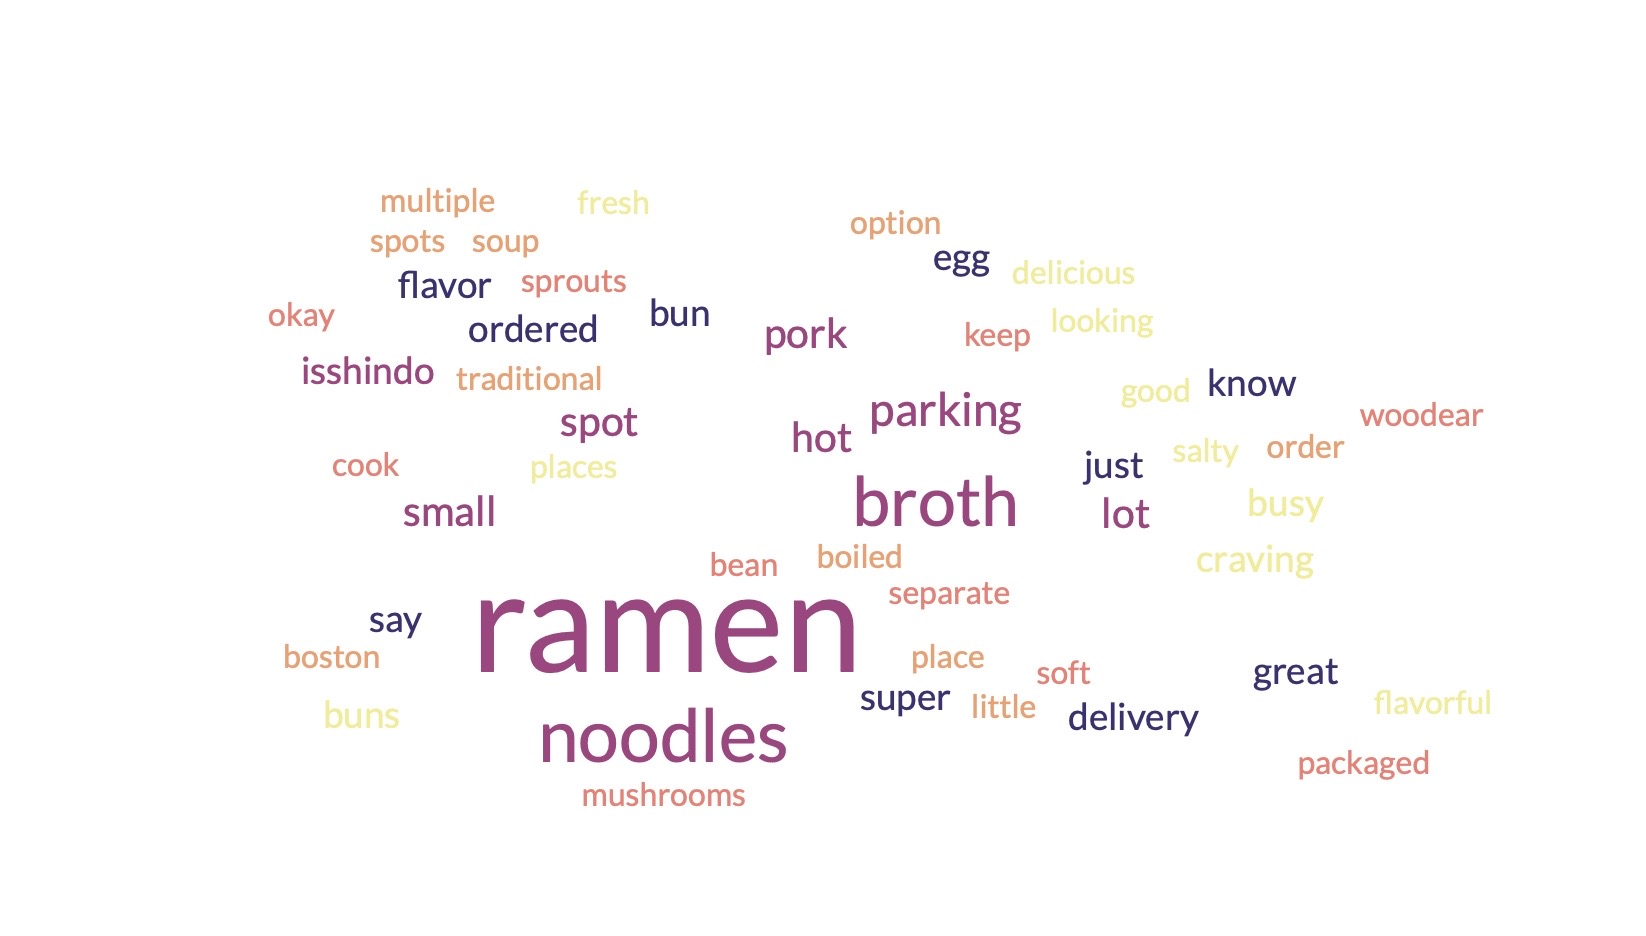

In [70]:
from IPython.display import Image, display
display(Image('/Users/xinhuaijin/Desktop/654 hw3/Image 10-30-23 at 1.03 AM.jpg'
))

The wordcloud shows the ingredidents, features and tastes of popular items in the restaurant.